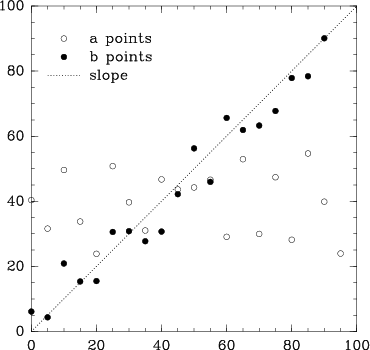

In [2]:
import biggles
import numpy
import numpy.random

p = biggles.FramedPlot()
p.xrange = 0, 100
p.yrange = 0, 100
p.aspect_ratio = 1

x = numpy.arange(0, 100, 5)
yA = numpy.random.normal(40, 10, (len(x),))
yB = x + numpy.random.normal(0, 5, (len(x),))

a = biggles.Points(x, yA, type="circle")
a.label = "a points"

b = biggles.Points(x, yB)
b.label = "b points"
b.style(type="filled circle")

l = biggles.Slope(1, type="dotted")
l.label = "slope"

k = biggles.PlotKey(.1, .9)
k += a
k += b, l

p.add(l, a, b, k)
p